In [1]:
import keras
import os
import cv2
from tensorflow.keras.preprocessing import image
from PIL import Image, ImageEnhance, ImageChops, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from keras import models
from keras import layers
from keras.layers import Dense,GlobalAveragePooling2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras import optimizers
from keras.models import Model
from keras.models import Sequential

In [2]:
model=Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(7))
model.add(Activation("softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 74, 74, 64)        0         
                                                        

In [7]:
data_gen_train = ImageDataGenerator(rescale=1/255.)

data_gen_valid = ImageDataGenerator(rescale=1/255.)

train_generator = data_gen_train.flow_from_directory('E:\\archive\\datatree\\datatree\\train', target_size=(224,224),batch_size=32, class_mode='categorical')

valid_generator = data_gen_valid.flow_from_directory('E:\\archive\\datatree\\datatree\\validation', target_size=(224,224),batch_size=32, class_mode='categorical')

Found 8000 images belonging to 7 classes.
Found 2015 images belonging to 7 classes.


In [10]:
history=model.fit(train_generator,validation_data=valid_generator,epochs=32)

Epoch 1/32
250/250 [==============================] - 242s 965ms/step - loss: 1.1358 - accuracy: 0.6294 - val_loss: 1.0294 - val_accuracy: 0.6670
Epoch 2/32
250/250 [==============================] - 218s 873ms/step - loss: 1.0103 - accuracy: 0.6510 - val_loss: 1.5736 - val_accuracy: 0.5022
Epoch 3/32
250/250 [==============================] - 218s 871ms/step - loss: 0.9598 - accuracy: 0.6611 - val_loss: 1.0941 - val_accuracy: 0.6754
Epoch 4/32
250/250 [==============================] - 220s 880ms/step - loss: 0.9246 - accuracy: 0.6690 - val_loss: 1.0133 - val_accuracy: 0.6720
Epoch 5/32
250/250 [==============================] - 226s 904ms/step - loss: 0.8759 - accuracy: 0.6812 - val_loss: 0.8338 - val_accuracy: 0.6789
Epoch 6/32
250/250 [==============================] - 224s 896ms/step - loss: 0.8382 - accuracy: 0.6898 - val_loss: 0.8590 - val_accuracy: 0.6998
Epoch 7/32
250/250 [==============================] - 223s 890ms/step - loss: 0.8322 - accuracy: 0.6955 - val_loss: 0.8419 -

In [11]:
model.save("mymodimprove.h5")
print("hii")  

hii


In [8]:
from tensorflow import keras
loaded=keras.models.load_model("mymodimprove.h5")


In [28]:
def predictionn(path):
    a=image.load_img(path,target_size=(224,224,3))
   # print(a)
    print("\n\n")
    a=image.img_to_array(a)
    plt.imshow(a/255)
    img = np.array(a) / 255.0
    i=np.expand_dims(img,axis=0)
    p=loaded.predict(i)
    ref={  
    "1":"akiec",
    "2":"bcc",
    "3":"bkl",   
    "4":"df",
    "5":"mel",
    "6":"nv",
    "7":"vasc",
    }
    pred=np.argmax(p)    
    m=0
    s=['akiec','bcc','bkl','df','mel','nv','vasc']
    for i in p:
        for j in i:
            print(s[m],end="   :  ")
            print(j)
            m=m+1
    print(f"\n{s[pred]}")




akiec   :  0.032882117
bcc   :  0.2546992
bkl   :  0.18234162
df   :  0.023389338
mel   :  0.025042415
nv   :  0.46846312
vasc   :  0.013182212

nv


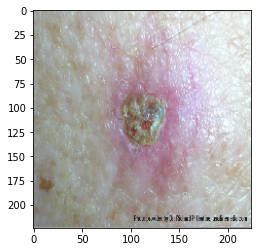

In [29]:
predictionn("C:\\Users\\kavinraja\\Desktop\\aaa.jpeg")